In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [42]:
import os
import glob
import random
import matplotlib.pyplot as plt
import cv2

In [33]:
IMAGES_DIR = '/content/drive/MyDrive/avito/project/auto-10k'

In [34]:
images = sorted(glob.glob(os.path.join(IMAGES_DIR, '*.jpg')))

Посмотрим на случайную подвыборку из 20 фото

In [40]:
def plot_samples(images, nrows=4, ncols=5, preprocess=None):

    f, axes = plt.subplots(nrows=nrows, ncols=ncols,)
    f.set_figheight(12)
    f.set_figwidth(16)

    for image_file, ax in zip(images, axes.flatten()):
        image_file = image_file
        im = plt.imread(image_file)
        im = preprocess(im) if preprocess else im
        ax.imshow(im, cmap='gray')
        ax.axis('off')

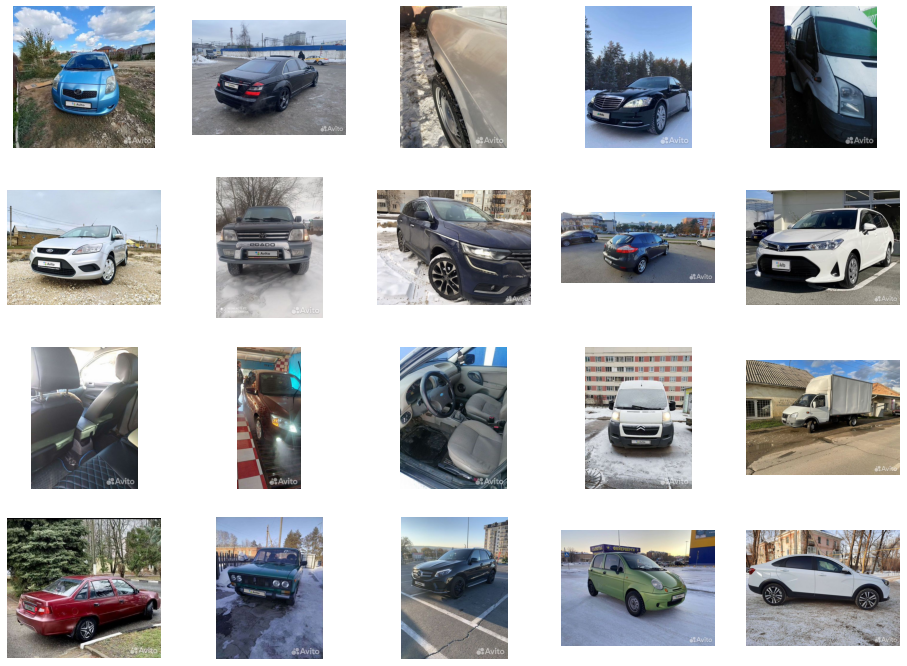

In [41]:
plot_samples(random.sample(images, 20))

In [22]:
images[0]

'/content/drive/MyDrive/avito/project/auto-10k/10038512537.jpg'

# Выявление проблем в данных

In [37]:
bad_examples = ['16535585834.jpg',
                '16523953278.jpg',
                '16448829086.jpg',
                '9083562101.jpg',
                '15541805315.jpg',
                '14988664855.jpg',
                '14679178083.jpg',
                '14174399899.jpg',
                '14000342396.jpg',
                '13861485993.jpg',
                '13886501558.jpg',
                '12936716258.jpg',
                '10904330166.jpg',
                '10761460520.jpg',
                '9076551799.jpg',
                '8497281052.jpg',
                '8119255286.jpg',
                '7997318492.jpg',
                '6330011797.jpg',
                '5844250291.jpg']
bad_examples = list(map(lambda s: os.path.join(IMAGES_DIR, s), bad_examples))

Какие проблемы были выявлены в данных:

1) На фотографии не всегда автомобиль полностью - может быть только одна его часть. В таких случаях перенос этой вырезанной части на другой фон становится бессмысленным

2) Фото может быть сделано изнутри, из салона

3) На фото может вообще не быть автомобиля. Ниже есть пример, где на фото СТС

4) На одном фото может быть несколько автомобилей

5) Изображение автомобиля может быть под углом, обычно не болбше 90 градусов 

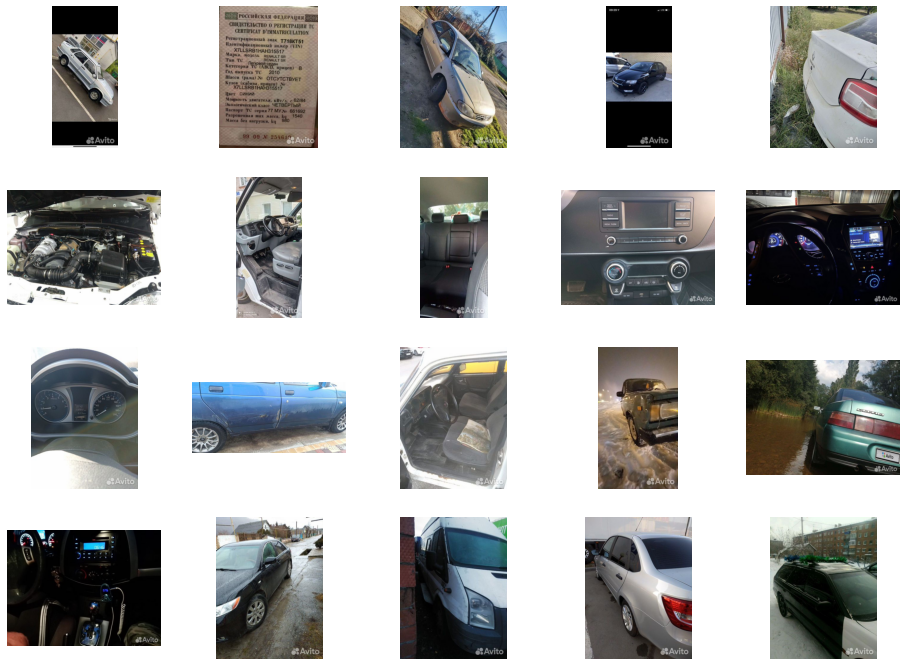

In [38]:
plot_samples(bad_examples)

Для решения проблем 1-3 мы обучим классификатор валидности фото, который будет определять, возможно ли вырезать авто в принципе. 

Проблема 4 может быть решена правильной разметкой для сегментации. Если на этапе разметки выделять только автомобиль, находящийся на переднем фоне, модель для сегментации тоже научиться игнорировать все остальные автомобили.

Проблема 5 может быть решена обычными аугментациями

# Подбор оптимального разрешения

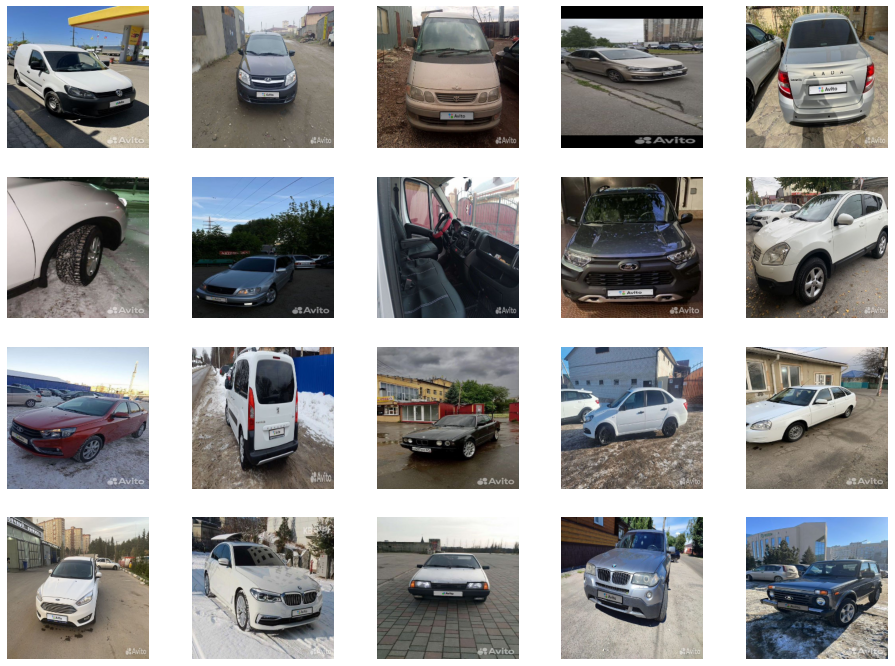

In [43]:
plot_samples(random.sample(images, 20), preprocess=lambda im: cv2.resize(im, (256, 256)))

Большинство предобученных сетей работает с изображениями разрешнием не ниже (256, 256). Как видно по графикам выше, для данного разрешения автомобиль можно довольно легко и однозначно определить положение автомобиля на фото, а значит этого разрешения достаточно для решения задачи 

# Аугментации

Для данной задачи нет сильных ограничений по используемым аугментациям. 

Можно использовать изменение цветовой гаммы, углов поворота (не больше 90 градусов), зашумление, отражение по вертикальной оси.

Не стоит использовать отражение по горизонтальной оси. Маловероятно, что пользователь загрузит перевернутое фото машины (но это не точно).

# Дополнительные данные

Можно использовать модели, предобученные на открытых датасетах, например из kaggle соревнования CARVANA. 

Также данные можно сгенерировать в этой [статье](https://habr.com/ru/company/bigdataplatform/blog/597173/) описано, как данные автомобилей для обучения моделей были сгенерированы с помощью blender и с помощью генеративной модели DatasetGAN.

Пока сложно сказать, понадобиться ли генерировать данные с помощью дополнительного софта и моделей. Скорее всего данных АВИТО и данных из открытых датасетов будет вполне достаточно для достижения хорошего качества.